# Import Data and Metadata

In [1]:
# import modules
import pandas as pd

In [2]:
# import data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
5470,TAG 44:4+NH4 (-FA 14:0 (NH4)),27.0000,0.0000,23.0000,28.0000,45.0000,17.00,86.0,108.0,57.0000,...,94.0000,145.0000,177.0000,148.0000,179.0000,213.0000,50.0000,71.0000,84.0000,145.0000
4218,HexCer 30:0;2 (LCB 17:0;2-2H2O),0.0000,31.0734,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5105,SM 44:0;4 (SM),86.4727,0.0000,106.2706,15.7105,15.3581,28.74,0.0,0.0,34.1757,...,28.5969,6.5881,7.2474,12.6374,110.4321,98.7502,89.5388,9.6137,63.1071,30.2156


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
807,GD2 36:4;2 (LCB 18:0;2-2H2O),GD2,36,4
1038,NAPE 36:2+NH4 (-NAPE (22:5 NH4)),NAPE,36,2
980,PE 38:11 (-PE),PE,38,11


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_df_exps.csv')
df_exps.head()

,Exp,Mutation
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


# Get Head Groups

In [5]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [6]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,3.327747,4.627764,4.285955,5.792399,2.715498,2.089358,4.224837,4.287872,4.048319,4.102020,...,5.709738,5.583874,4.445054,2.958673,3.868621,4.140119,2.224146,2.075251,2.137112,2.541275
DMPE,0.015057,0.015768,0.017596,0.017543,0.017295,0.012298,0.016800,0.018839,0.017298,0.016907,...,0.036592,0.030624,0.017285,0.017659,0.020933,0.022313,0.026906,0.027350,0.025641,0.025454
DMPE O,0.011459,0.013607,0.012600,0.013656,0.005728,0.005537,0.007930,0.007579,0.007004,0.007431,...,0.033240,0.027250,0.009158,0.011753,0.009870,0.010285,0.010922,0.010832,0.011141,0.009029
GD1,0.011262,0.013391,0.011573,0.010751,0.011116,0.000681,0.014928,0.017508,0.009102,0.006709,...,0.018864,0.018089,0.012946,0.008132,0.009337,0.008526,0.006783,0.007213,0.009078,0.007233
GD2,0.030256,0.027723,0.028536,0.026268,0.050747,0.047589,0.041774,0.046441,0.039156,0.043480,...,0.021568,0.020747,0.017535,0.023648,0.010388,0.010485,0.027208,0.031564,0.030845,0.028813


In [7]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,PE,PE O,PG,PG O,PS,PS O,SGalCer,SM,TAG,Mutation
0,CAS9-A,3.327747,0.015057,0.011459,0.011262,0.030256,0.073065,0.066396,0.205211,0.317254,...,8.454494,2.192886,0.211331,0.163770,4.412562,7.838364,0.095122,17.556038,2.994822,CAS9
1,CAS9-A.1,4.627764,0.015768,0.013607,0.013391,0.027723,0.067870,0.065470,0.230014,0.376057,...,8.860324,2.274646,0.218279,0.169763,2.706633,6.344535,0.095466,17.894487,3.129252,CAS9
2,CAS9-B,4.285955,0.017596,0.012600,0.011573,0.028536,0.066231,0.063416,0.213234,0.303792,...,8.948958,2.368888,0.212007,0.161765,3.149986,6.170663,0.096021,19.036777,2.789761,CAS9
3,CAS9-B.1,5.792399,0.017543,0.013656,0.010751,0.026268,0.046150,0.056247,0.141883,0.282959,...,8.384605,2.142814,0.200585,0.146495,3.045088,7.038746,0.083192,17.294793,2.683491,CAS9
4,CAV_A,2.715498,0.017295,0.005728,0.011116,0.050747,0.081532,0.094665,0.149935,0.261631,...,13.680332,3.873665,0.399648,0.545936,4.238407,4.332422,0.121323,18.061737,2.871534,CAV


In [8]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [9]:
# convert to long format
h = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h.head()

,Mutation,Head Group,Percentage
0,CAS9,DAG,3.327747
1,CAS9,DAG,4.627764
2,CAS9,DAG,4.285955
3,CAS9,DAG,5.792399
4,CAV,DAG,2.715498


In [10]:
# remove RAJU
h = h[h['Mutation'] != 'RAJU']

In [11]:
h[(h['Head Group'] == 'MAG') & (h['Percentage'] != 0)]

,Mutation,Head Group,Percentage
1054,CAV,MAG,0.007436
1055,CAV,MAG,0.010044
1056,CAV,MAG,0.006613
1057,CAV,MAG,0.006737


# Donut charts for each protein/mutation

In [12]:
# import modules
import altair as alt

In [13]:
len(h['Head Group'].unique())

40

In [14]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/head_group_graphs/HeadGroupDonutCharts_interactive.html')
# d

d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:9]) & heads
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups

In [15]:
# join to row metadata
h = df_meta[['Sample Name', 'Head Group']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [16]:
# remove PC/PE
h = h[~h['Head Group'].isin(['PE', 'PE O', 'PC', 'PC O'])]

In [17]:
# get percentage of each head group per sample
h = h.groupby('Head Group').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group,,,,,,,,,,,,,,,,,,,,,
DAG,6.769491,9.555327,8.929353,12.213968,6.608236,5.138405,9.384206,9.765538,8.113235,8.434356,...,14.971530,13.849495,8.942606,5.953887,7.767769,8.185831,3.980345,3.796153,3.881742,4.408646
DMPE,0.030629,0.032557,0.036660,0.036992,0.042087,0.030244,0.037315,0.042906,0.034668,0.034764,...,0.095948,0.075955,0.034773,0.035536,0.042030,0.044117,0.048151,0.050030,0.046573,0.044159
DMPE O,0.023311,0.028095,0.026251,0.028796,0.013940,0.013617,0.017613,0.017262,0.014036,0.015280,...,0.087158,0.067588,0.018423,0.023651,0.019819,0.020335,0.019546,0.019815,0.020236,0.015664
GD1,0.022909,0.027649,0.024110,0.022669,0.027050,0.001676,0.033159,0.039873,0.018241,0.013794,...,0.049464,0.044866,0.026044,0.016364,0.018747,0.016858,0.012138,0.013194,0.016490,0.012547
GD2,0.061549,0.057242,0.059453,0.055388,0.123495,0.117037,0.092789,0.105768,0.078473,0.089400,...,0.056554,0.051459,0.035277,0.047587,0.020858,0.020732,0.048692,0.057739,0.056026,0.049986


In [18]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,DAG,DMPE,DMPE O,GD1,GD2,GD3,GM1,GM2,GM3,...,MMPE O,NAPE,PG,PG O,PS,PS O,SGalCer,SM,TAG,Mutation
0,CAS9-A,6.769491,0.030629,0.023311,0.022909,0.061549,0.148633,0.135067,0.417452,0.645376,...,0.030848,3.880152,0.429901,0.333151,8.976282,15.945243,0.193503,35.713485,6.092236,CAS9
1,CAS9-A.1,9.555327,0.032557,0.028095,0.027649,0.057242,0.140136,0.135182,0.474929,0.776477,...,0.028914,4.171589,0.450698,0.350523,5.588610,13.100087,0.197117,36.948225,6.461226,CAS9
2,CAS9-B,8.929353,0.036660,0.026251,0.024110,0.059453,0.137985,0.132121,0.444252,0.632921,...,0.030365,4.261397,0.441695,0.337021,6.562677,12.855951,0.200050,39.661195,5.812185,CAS9
3,CAS9-B.1,12.213968,0.036992,0.028796,0.022669,0.055388,0.097312,0.118604,0.299177,0.596653,...,0.034303,4.169053,0.422957,0.308902,6.420934,14.842040,0.175420,36.468146,5.658462,CAS9
4,CAV_A,6.608236,0.042087,0.013940,0.027050,0.123495,0.198410,0.230371,0.364871,0.636685,...,0.015749,3.247856,0.972554,1.328550,10.314276,10.543065,0.295242,43.953723,6.987956,CAV


In [19]:
# drop head groups where all values are zero
h = h.loc[:, (h!=0).any(axis=0)]

In [20]:
# convert to long format
h = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h.head()

,Mutation,Head Group,Percentage
0,CAS9,DAG,6.769491
1,CAS9,DAG,9.555327
2,CAS9,DAG,8.929353
3,CAS9,DAG,12.213968
4,CAV,DAG,6.608236


In [21]:
# remove RAJU
h = h[h['Mutation'] != 'RAJU']

In [22]:
len(h['Head Group'].unique())

36

In [23]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h['Mutation'].unique():
    source = h[h['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=100).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='rainbow'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=400,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title=alt.Title('Average Percentage of Head Group', color='white')).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/head_group_graphs/HeadGroupDonutCharts_interactive.html')
d

alt.VConcatChart(...)

# Donut charts, without PE/PC head groups, combine similar head groups

In [24]:
# add combined head groups to df_meta
hg_list = df_meta['Head Group'].unique()
hg2_list = []
for hg in hg_list:
    # first sort the O groups (ex: PC, PC O)
    if " " in hg:
        hg2 = hg.split(" ")[0] 
        
    # sort the 1/2/3 groups(GD, GT)
    elif hg[-1] in ['1', '2', '3']:
        hg2 = hg[:-1]
    
    # get the hexcer
    elif 'Hex' in hg:
        hg2 = 'Hex_Cer'
        
    # get the acylglycerols
    elif hg in 'DAG,TAG,MAG':
        hg2='DAG,TAG,MAG'
    
    # all others    
    else:
        hg2 = hg
        
    hg2_list.append(hg2)
    
df_hg = pd.DataFrame({'Head Group': hg_list, 'Head Group 2': hg2_list})
df_hg.sort_values('Head Group').sample(3)

,Head Group,Head Group 2
37,MADAG,MADAG
8,LMMPE O,LMMPE
1,GT3,GT


In [25]:
df_meta2 = df_meta.merge(df_hg, on='Head Group')
df_meta2.head()

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer,26,2,Hex_Cer
2,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer,26,2,Hex_Cer
3,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer,26,0,Hex_Cer
4,Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer,26,0,Hex_Cer


In [26]:
# join to row metadata
h = df_meta2[['Sample Name', 'Head Group 2']].merge(df, on='Sample Name')
h.head(3)

,Sample Name,Head Group 2,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex_Cer,167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex_Cer,167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066


In [27]:
# remove PC/PE
h = h[~h['Head Group 2'].isin(['PE', 'PC'])]

In [28]:
# get percentage of each head group per sample
h = h.groupby('Head Group 2').sum()
h = h/h.sum() * 100
h.head()

,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,CAVIN_A.1,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
Head Group 2,,,,,,,,,,,,,,,,,,,,,
"DAG,TAG,MAG",12.861727,16.016553,14.741538,17.872430,13.614287,12.063763,13.087388,13.534524,13.269232,13.619432,...,18.372768,17.053978,12.019185,9.112355,13.686814,14.273404,9.481065,9.737838,9.918623,9.763795
DMPE,0.053940,0.060652,0.062911,0.065788,0.056026,0.043861,0.054928,0.060168,0.048704,0.050043,...,0.183107,0.143543,0.053197,0.059188,0.061849,0.064451,0.067697,0.069845,0.066809,0.059823
GD,0.233092,0.225028,0.221548,0.175369,0.348955,0.328904,0.403943,0.428213,0.278593,0.269685,...,0.243408,0.207779,0.265212,0.287862,0.196602,0.179596,0.208811,0.224453,0.211342,0.188216
GM,1.197895,1.386587,1.209294,1.014434,1.231926,0.941557,1.549682,1.651217,1.051408,1.010702,...,0.625928,0.543788,1.227586,1.288774,1.064095,1.018359,0.875355,0.914477,0.949152,0.854627
GT,0.071591,0.079667,0.078947,0.067369,0.111872,0.074922,0.106164,0.119482,0.084504,0.084584,...,0.095181,0.086214,0.051665,0.049184,0.032978,0.029564,0.057128,0.072262,0.062516,0.057384


In [29]:
# join to df_exps to get protein/mutations
h = h.T.rename_axis('Exp').merge(df_exps, on='Exp')
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM,Mutation
0,CAS9-A,12.861727,0.053940,0.233092,1.197895,0.071591,1.201140,0.003286,0.005302,0.339089,0.023267,0.0,18.464030,0.073921,3.880152,0.763052,24.921526,0.193503,35.713485,CAS9
1,CAS9-A.1,16.016553,0.060652,0.225028,1.386587,0.079667,1.397925,0.003051,0.004963,0.270384,0.025205,0.0,19.653469,0.069667,4.171589,0.801222,18.688696,0.197117,36.948225,CAS9
2,CAS9-B,14.741538,0.062911,0.221548,1.209294,0.078947,1.256955,0.001934,0.002798,0.354692,0.025935,0.0,17.652239,0.071223,4.261397,0.778716,19.418628,0.200050,39.661195,CAS9
3,CAS9-B.1,17.872430,0.065788,0.175369,1.014434,0.067369,1.008141,0.002645,0.002906,0.345781,0.017472,0.0,16.549438,0.070775,4.169053,0.731859,21.262974,0.175420,36.468146,CAS9
4,CAV_A,13.614287,0.056026,0.348955,1.231926,0.111872,1.223951,0.009785,0.008109,1.099156,0.117719,0.0,11.453852,0.069095,3.247856,2.301104,20.857342,0.295242,43.953723,CAV


In [30]:
# convert to long format
h_long = h[h.columns[1:]].melt('Mutation', var_name='Head Group', value_name='Percentage')
h_long.head()

,Mutation,Head Group,Percentage
0,CAS9,"DAG,TAG,MAG",12.861727
1,CAS9,"DAG,TAG,MAG",16.016553
2,CAS9,"DAG,TAG,MAG",14.741538
3,CAS9,"DAG,TAG,MAG",17.872430
4,CAV,"DAG,TAG,MAG",13.614287


In [31]:
# remove RAJU
h_long = h_long[h_long['Mutation'] != 'RAJU']

In [32]:
len(h_long['Head Group'].unique())

18

In [33]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(h_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in h_long['Mutation'].unique():
    source = h_long[h_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Percentage):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Percentage)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

alt.VConcatChart(...)

# Correlation Map of Head Groups

In [34]:
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM,Mutation
0,CAS9-A,12.861727,0.053940,0.233092,1.197895,0.071591,1.201140,0.003286,0.005302,0.339089,0.023267,0.0,18.464030,0.073921,3.880152,0.763052,24.921526,0.193503,35.713485,CAS9
1,CAS9-A.1,16.016553,0.060652,0.225028,1.386587,0.079667,1.397925,0.003051,0.004963,0.270384,0.025205,0.0,19.653469,0.069667,4.171589,0.801222,18.688696,0.197117,36.948225,CAS9
2,CAS9-B,14.741538,0.062911,0.221548,1.209294,0.078947,1.256955,0.001934,0.002798,0.354692,0.025935,0.0,17.652239,0.071223,4.261397,0.778716,19.418628,0.200050,39.661195,CAS9
3,CAS9-B.1,17.872430,0.065788,0.175369,1.014434,0.067369,1.008141,0.002645,0.002906,0.345781,0.017472,0.0,16.549438,0.070775,4.169053,0.731859,21.262974,0.175420,36.468146,CAS9
4,CAV_A,13.614287,0.056026,0.348955,1.231926,0.111872,1.223951,0.009785,0.008109,1.099156,0.117719,0.0,11.453852,0.069095,3.247856,2.301104,20.857342,0.295242,43.953723,CAV


In [35]:
# remove sample column
h_corr = h.iloc[:,1:]

# drop RAJU
h_corr = h_corr[h_corr['Mutation'] != 'RAJU']
# drop WT
h_corr = h_corr[h_corr['Mutation'] != 'WT']

# set protein column as index
h_corr = h_corr.set_index('Mutation')

h_corr.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,,
CAS9,12.861727,0.053940,0.233092,1.197895,0.071591,1.201140,0.003286,0.005302,0.339089,0.023267,0.0,18.464030,0.073921,3.880152,0.763052,24.921526,0.193503,35.713485
CAS9,16.016553,0.060652,0.225028,1.386587,0.079667,1.397925,0.003051,0.004963,0.270384,0.025205,0.0,19.653469,0.069667,4.171589,0.801222,18.688696,0.197117,36.948225
CAS9,14.741538,0.062911,0.221548,1.209294,0.078947,1.256955,0.001934,0.002798,0.354692,0.025935,0.0,17.652239,0.071223,4.261397,0.778716,19.418628,0.200050,39.661195
CAS9,17.872430,0.065788,0.175369,1.014434,0.067369,1.008141,0.002645,0.002906,0.345781,0.017472,0.0,16.549438,0.070775,4.169053,0.731859,21.262974,0.175420,36.468146
CAV,13.614287,0.056026,0.348955,1.231926,0.111872,1.223951,0.009785,0.008109,1.099156,0.117719,0.0,11.453852,0.069095,3.247856,2.301104,20.857342,0.295242,43.953723


In [36]:
# normalize the head groups
h_corr = h_corr/h_corr.sum()
h_corr.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,,
CAS9,0.028547,0.018823,0.023427,0.030264,0.027180,0.030385,0.012989,0.027612,0.015744,0.008004,0.0,0.042834,0.027736,0.018504,0.016057,0.033827,0.022380,0.022411
CAS9,0.035549,0.021165,0.022616,0.035031,0.030246,0.035363,0.012058,0.025847,0.012554,0.008671,0.0,0.045593,0.026140,0.019893,0.016861,0.025367,0.022798,0.023186
CAS9,0.032719,0.021953,0.022267,0.030551,0.029973,0.031797,0.007643,0.014571,0.016469,0.008922,0.0,0.040951,0.026724,0.020322,0.016387,0.026358,0.023137,0.024888
CAS9,0.039668,0.022957,0.017625,0.025629,0.025577,0.025503,0.010456,0.015132,0.016055,0.006010,0.0,0.038392,0.026556,0.019881,0.015401,0.028861,0.020288,0.022884
CAV,0.030217,0.019551,0.035072,0.031123,0.042473,0.030962,0.038673,0.042230,0.051035,0.040496,0.0,0.026571,0.025925,0.015488,0.048424,0.028310,0.034147,0.027582


In [37]:
h_corr = h_corr.groupby('Mutation').mean().T
h_corr.head()

Mutation,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG
"DAG,TAG,MAG",0.034121,0.029020,0.032042,0.019762,0.024100,0.017378,0.026340,0.039998,0.027240
DMPE,0.021224,0.018755,0.017634,0.028059,0.025889,0.026859,0.026032,0.064726,0.020822
GD,0.021484,0.037941,0.024086,0.036470,0.030444,0.026678,0.028216,0.021333,0.023349
GM,0.030369,0.033944,0.022017,0.038215,0.028015,0.030257,0.023878,0.014258,0.029046
GT,0.028244,0.039147,0.029708,0.016872,0.025488,0.029800,0.036339,0.028894,0.015508


In [38]:
# create correlation matrix
corr = h_corr.corr()

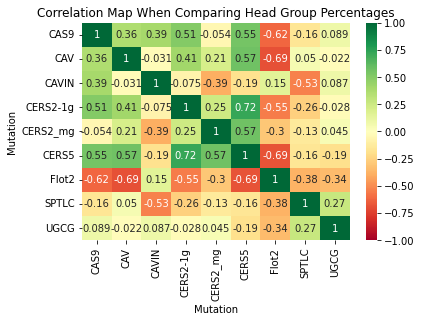

In [39]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=True).set_title('Correlation Map When Comparing Head Group Percentages')
plt.show()

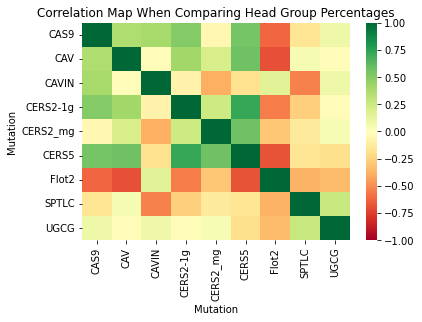

In [40]:
sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn').set_title('Correlation Map When Comparing Head Group Percentages')
plt.show()

In [41]:
h.head()

,Exp,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM,Mutation
0,CAS9-A,12.861727,0.053940,0.233092,1.197895,0.071591,1.201140,0.003286,0.005302,0.339089,0.023267,0.0,18.464030,0.073921,3.880152,0.763052,24.921526,0.193503,35.713485,CAS9
1,CAS9-A.1,16.016553,0.060652,0.225028,1.386587,0.079667,1.397925,0.003051,0.004963,0.270384,0.025205,0.0,19.653469,0.069667,4.171589,0.801222,18.688696,0.197117,36.948225,CAS9
2,CAS9-B,14.741538,0.062911,0.221548,1.209294,0.078947,1.256955,0.001934,0.002798,0.354692,0.025935,0.0,17.652239,0.071223,4.261397,0.778716,19.418628,0.200050,39.661195,CAS9
3,CAS9-B.1,17.872430,0.065788,0.175369,1.014434,0.067369,1.008141,0.002645,0.002906,0.345781,0.017472,0.0,16.549438,0.070775,4.169053,0.731859,21.262974,0.175420,36.468146,CAS9
4,CAV_A,13.614287,0.056026,0.348955,1.231926,0.111872,1.223951,0.009785,0.008109,1.099156,0.117719,0.0,11.453852,0.069095,3.247856,2.301104,20.857342,0.295242,43.953723,CAV


In [42]:
# remove sample column
h_corr2 = h.iloc[:,1:]

# drop RAJU
h_corr2 = h_corr2[h_corr2['Mutation'] != 'RAJU']
# drop WT
h_corr2 = h_corr2[h_corr2['Mutation'] != 'WT']

h_corr2 = h_corr2.groupby('Mutation').mean()
h_corr2 = h_corr2.div(h_corr2.sum(axis=1), axis=0)
h_corr2 = h_corr2/h_corr2.sum()

h_corr2.head()



# # set protein column as index
# h_corr2 = h_corr.set_index('protein')

# h_corr2.head()

,"DAG,TAG,MAG",DMPE,GD,GM,GT,Hex_Cer,LDMPE,LMMPE,LPC,LPE,LPG,MADAG,MMPE,NAPE,PG,PS,SGalCer,SM
Mutation,,,,,,,,,,,,,,,,,,
CAS9,0.136482,0.084897,0.085935,0.121474,0.112976,0.123049,0.043146,0.083161,0.060822,0.031607,0.000000,0.167770,0.107155,0.078600,0.064706,0.114412,0.088603,0.093368
CAV,0.116080,0.075020,0.151764,0.135778,0.156586,0.148874,0.101587,0.182240,0.160228,0.086032,0.000000,0.098334,0.098045,0.083010,0.174820,0.110417,0.158308,0.112614
CAVIN,0.128167,0.070535,0.096342,0.088069,0.118830,0.088973,0.044412,0.136358,0.083218,0.084135,0.121709,0.174890,0.077637,0.134316,0.096026,0.089188,0.098828,0.098398
CERS2-1g,0.079047,0.112235,0.145880,0.152862,0.067490,0.130031,0.038991,0.063267,0.106844,0.033668,0.027524,0.085798,0.084651,0.119168,0.101337,0.117513,0.107085,0.121928
CERS2_mg,0.096399,0.103555,0.121775,0.112058,0.101951,0.106638,0.075928,0.061920,0.126815,0.183874,0.051271,0.068508,0.080059,0.086050,0.090892,0.128715,0.124974,0.122252


<AxesSubplot:xlabel='Mutation', ylabel='Mutation'>

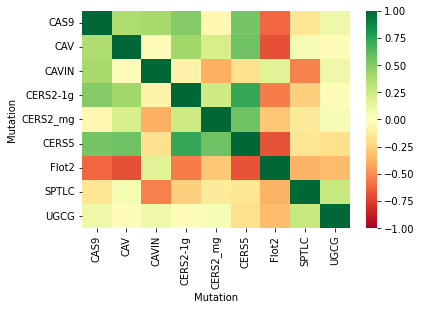

In [43]:
sns.heatmap(h_corr2.T.corr(), vmin=-1, vmax=1, cmap='RdYlGn')

# Donut Charts, normalize before PE/PC removed

In [44]:
import functions

In [45]:
# import data

In [46]:
df_meta2 = pd.read_csv('dataframes/pos_lipids_df_meta2.csv')
df_meta2.sample(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
2793,"Hex3Cer 48:0;4 (LCB 18:1;2-2H2O,LCB 18:0;3-3H2O)",Hex3Cer,48,0,Hex_Cer,0


In [47]:
df_p = functions.df_p(df, df_exps)
df_p.sample(1)

Mutation,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
"GM1 42:0;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14.3398,65.9969,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
hg_long = functions.norm_long(df_meta2, df_p, var='Head Group 2', renamed_var='Head Group', drop_mutation=['RAJU'])
hg_long.head()

,Mutation,Head Group,Fraction
0,CAS9,"DAG,TAG,MAG",0.063226
1,CAS9,"DAG,TAG,MAG",0.077570
2,CAS9,"DAG,TAG,MAG",0.070757
3,CAS9,"DAG,TAG,MAG",0.084759
4,CAV,"DAG,TAG,MAG",0.055945


In [49]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(hg_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in hg_long['Mutation'].unique():
    source = hg_long[hg_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', alt.value('lightgray'), scale=alt.Scale(scheme='tableau20'), legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
d = d.properties(title={'text':['Average Percentage of Head Group'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

# d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:]) & heads
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

alt.VConcatChart(...)

In [50]:
hg2_long = functions.norm_long(df_meta2, 
                               df_p, 
                               var='Head Group 2', 
                               renamed_var='Head Group', 
                               drop_mutation=['RAJU'],
                               drop_var=['PE', 'PC']
                              )

In [51]:
chart_list = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(hg2_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group', 'subtitleColor':'white'})

for ptn in hg2_long['Mutation'].unique():
    source = hg2_long[hg2_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', 
                            alt.value('lightgray'), 
                            scale=alt.Scale(scheme='tableau20'), 
                            legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn, 'subtitleColor':'white'}
    )
    
    chart_list.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 
#                         'subtitleColor':'white'}
#                 ).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

d = alt.hconcat(*chart_list[:5]) & alt.hconcat(*chart_list[5:9]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC removed'], 'color': 'white', 'subtitleColor':'white'}).configure(background='black').configure_axis(labelColor='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

alt.VConcatChart(...)

In [52]:
chart_listw = []

# create selection tool
click = alt.selection_point(fields=['Head Group'])

# create head group legend
heads = alt.Chart(hg2_long).mark_point().encode(
    x=alt.X('Head Group').axis(labelAngle=-45),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

for ptn in hg2_long['Mutation'].unique():
    source = hg2_long[hg2_long['Mutation'] == ptn]
    
    donut = alt.Chart(source).mark_arc(innerRadius=90).encode(
        theta='mean(Fraction):Q',
        color=alt.condition(click, 'Head Group', 
                            alt.value('lightgray'), 
                            scale=alt.Scale(scheme='tableau20'), 
                            legend=None),
        opacity = alt.condition(click, alt.value(1), alt.value(0.1)),
        tooltip=['Head Group', 'mean(Fraction)']
    ).add_params(click).properties(
        width=300,
        title={'text':[], 'subtitle':ptn}
    )
    
    chart_listw.append(donut)
    
# d = alt.hconcat(*chart_list[:3]) & alt.hconcat(*chart_list[3:6]) & alt.hconcat(*chart_list[6:9]) & (chart_list[9] | heads)
# d = d.properties(title={'text':['Average Percentage of Head Group'], 'subtitle':['PE/PC removed'], 'color': 'white', 
#                         'subtitleColor':'white'}
#                 ).configure(background='black').configure_axis(labelColor='white')
# # d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
# d

d = alt.hconcat(*chart_listw[:5]) & alt.hconcat(*chart_listw[5:]) & heads
d = d.properties(title={'text':['Average Percentage of Head Group'],  'subtitle':['PE/PC removed']}).configure(background='white')
# d.save('graphs/pos_mode_whole_dataset/updated_HeadGroupDonutCharts_noPC-PE_interactive.html')
d

alt.VConcatChart(...)

In [53]:
cas9 = chart_listw[0]
# cas9.save('graphs/presentation_figures/cas9.png', ppi=300)

In [54]:
wt = chart_listw[-1]
wt.save('graphs/presentation_figures/wt.png', ppi=300)

In [55]:
cavin = chart_listw[2]
cavin.save('graphs/presentation_figures/cavin.png', ppi=300)

In [56]:
cers1g = chart_listw[4]
cers1g.save('graphs/presentation_figures/cers1g.png', ppi=300)

In [57]:
heads = alt.Chart(hg2_long).mark_point().encode(
    y=alt.Y('Head Group'),
    color=alt.condition(click, 'Head Group', alt.value('lightgray')),
    ).add_params(click).properties(title={'text':[], 'subtitle':'Head Group'})

In [58]:
cas9 & heads

alt.VConcatChart(...)